In [ ]:
!pip install pandas mlxtend matplotlib google-cloud-storage

In [ ]:

# New project: Market Basket Analysis for Instacart Dataset

# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Example CSV Data Creation:
# Simulating the CSV for demonstration
orders = pd.DataFrame({
    'order_id': [1, 1, 2, 2, 3, 3],
    'product_id': [101, 102, 101, 103, 104, 105]
})

products = pd.DataFrame({
    'product_id': [101, 102, 103, 104, 105],
    'product_name': ['Bananas', 'Apples', 'Milk', 'Bread', 'Eggs']
})

order_products = pd.DataFrame({
    'order_id': [1, 1, 2, 2, 3, 3],
    'product_id': [101, 102, 101, 103, 104, 105]
})

In [ ]:
#Merging datasets
merged_data = pd.merge(order_products, products, on='product_id')

# Create a pivot table where each row represents an order and columns represent products
basket = merged_data.groupby(['order_id', 'product_name'])['product_id'].count().unstack().fillna(0)

# Convert to binary (purchased or not purchased)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Sort by lift to find the strongest rules
rules = rules.sort_values(by='lift', ascending=False)

# Save rules to CSV
rules.to_csv('market_basket_rules.csv', index=False)

# Define project_name
project_name = "Instacart Market Basket Analysis" # You can change this to your desired project name

# Display top 10 rules
print(f"Top 10 Association Rules in {project_name}:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Top 10 Association Rules in Instacart Market Basket Analysis:
  antecedents consequents   support  confidence  lift
4     (Bread)      (Eggs)  0.333333         1.0   3.0
5      (Eggs)     (Bread)  0.333333         1.0   3.0
0    (Apples)   (Bananas)  0.333333         1.0   1.5
1   (Bananas)    (Apples)  0.333333         0.5   1.5
2      (Milk)   (Bananas)  0.333333         1.0   1.5
3   (Bananas)      (Milk)  0.333333         0.5   1.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-bc2111fee3ce>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


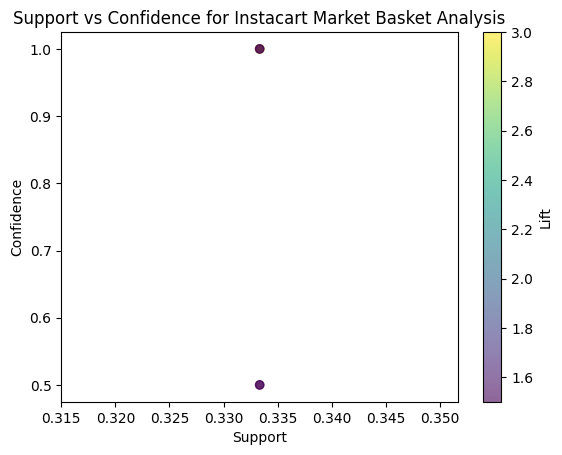

CSV file 'market_basket_rules.csv' has been created.


In [ ]:

# Plot the rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title(f'Support vs Confidence for {project_name}')
plt.show()

# Print message after CSV is created
print("CSV file 'market_basket_rules.csv' has been created.")